In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [38]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

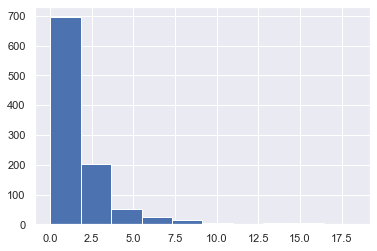

In [39]:
data_log.hist()

<AxesSubplot:>

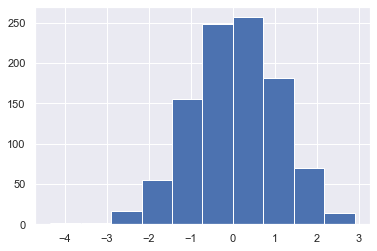

In [40]:
np.log(data_log).hist()

Почему это работает?

C:\Users\София\AppData\Local\Temp\ipykernel_9920\4063628510.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


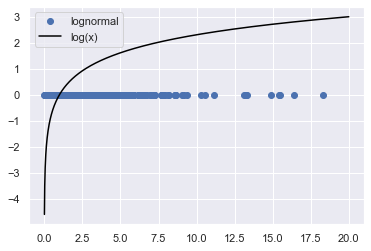

In [41]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data_log
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [42]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

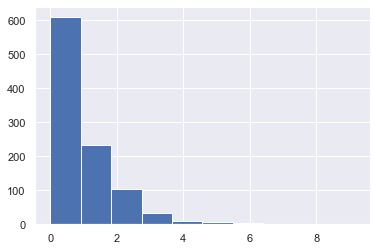

In [43]:
data_exp.hist()

<AxesSubplot:>

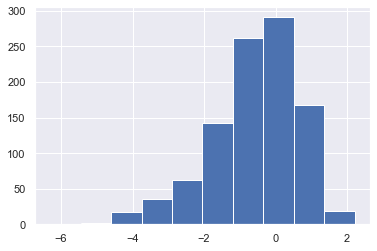

In [44]:
np.log(data_exp).hist()

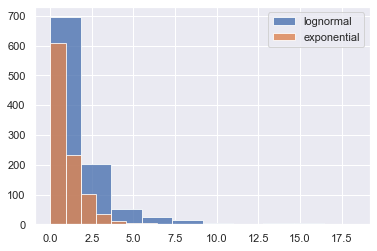

In [45]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [46]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

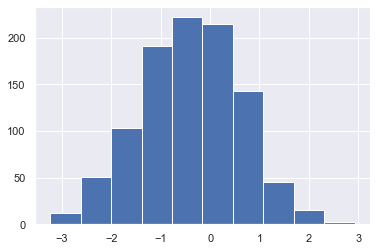

In [47]:
pd.Series(transformed_data).hist()

In [48]:
best_lambda

0.24161195735940813

# Отбор признаков

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


## Корреляционный анализ

In [52]:
#train_X.columns

In [53]:
#ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
#numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury','max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume','supergen_year-stop',]
#catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from','models_group', 'models_light-and-commercial','models_male']

In [54]:
#sns.histplot(data=train_X, x='engine-type')

In [55]:
#sns.pairplot(train_X[numerical]);

In [56]:
#train = train_X
#train['target'] = train_y
#sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [57]:
#from scipy.stats import pearsonr, spearmanr

#r = pearsonr(train['configurations_auto-premiere'], train['target'])
#print('Pearson correlation:', r[0], 'p-value:', r[1])

In [58]:
#r = pearsonr(train['battery-capacity'], train['target'])
#print('Pearson correlation:', r[0], 'p-value:', r[1])

## F-test

In [59]:
#from sklearn.feature_selection import f_regression, SelectKBest

In [60]:
#f_statistic, p_values = f_regression(train_X, train_y)

In [61]:
#p_values

In [62]:
#sekector = SelectKBest(f_regression, k=20)
#sekector.fit_transform(train_X, train_y)

In [63]:
#sekector.get_feature_names_out()

## Значения Шепли

In [64]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [65]:
import shap

In [66]:
reg = LinearRegression().fit(train_X, train_y)

In [67]:
test_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [68]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

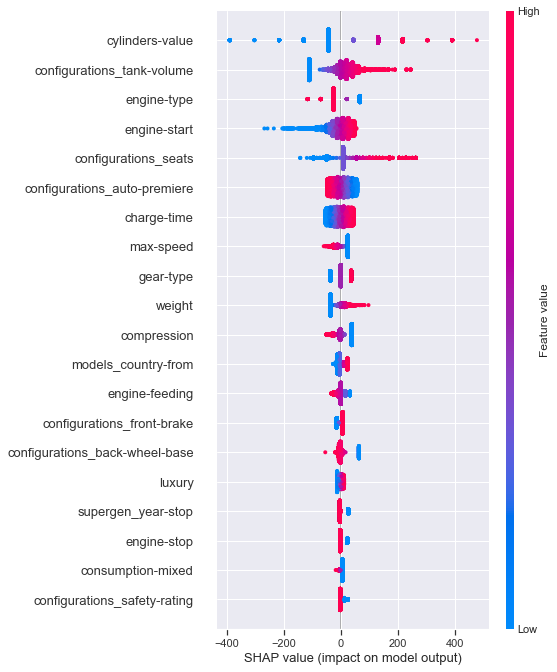

In [69]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [70]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

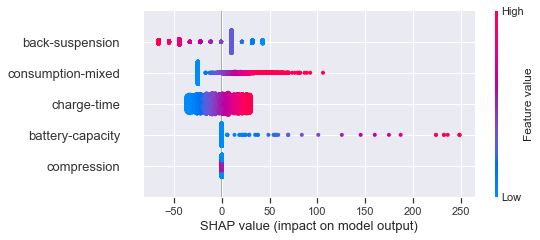

In [71]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [72]:
from itertools import chain, combinations
from math import factorial as f

def powerset(iterable, i):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    s.remove(i)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
list(powerset(train_cut_X, 'back-suspension'))

[(),
 ('battery-capacity',),
 ('charge-time',),
 ('compression',),
 ('consumption-mixed',),
 ('battery-capacity', 'charge-time'),
 ('battery-capacity', 'compression'),
 ('battery-capacity', 'consumption-mixed'),
 ('charge-time', 'compression'),
 ('charge-time', 'consumption-mixed'),
 ('compression', 'consumption-mixed'),
 ('battery-capacity', 'charge-time', 'compression'),
 ('battery-capacity', 'charge-time', 'consumption-mixed'),
 ('battery-capacity', 'compression', 'consumption-mixed'),
 ('charge-time', 'compression', 'consumption-mixed'),
 ('battery-capacity', 'charge-time', 'compression', 'consumption-mixed')]

In [73]:
train_cut_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed'],
      dtype='object')

In [75]:
sh = {}
for i in train_cut_X.columns:
    S = list(powerset(train_cut_X, i))
    sh_sum = 0
    for s in S:
        n = (f(len(s)) * f(len(train_cut_X.columns) +  len(s))) / f(len(train_cut_X.columns))
        fi = LinearRegression().fit(train_cut_X, train_y)
        f_i = LinearRegression().fit(train_cut_X.drop(i, axis=1), train_y)
        sh_sum += n*(fi.score(test_cut_X, test_y) - f_i.score(test_cut_X.drop(i, axis=1), test_y))
    sh[i] = sh_sum
sh
    
    


{'back-suspension': 1110.7369931479516,
 'battery-capacity': 108.83612156289044,
 'charge-time': 459.91636749264677,
 'compression': 0.3886664540156546,
 'consumption-mixed': 677.7873114294996}

In [77]:
print("Важность признаков по Шепли:")
sorted(sh.items(), key=lambda item: item[1], reverse=True)

Важность признаков по Шепли:


[('back-suspension', 1110.7369931479516),
 ('consumption-mixed', 677.7873114294996),
 ('charge-time', 459.91636749264677),
 ('battery-capacity', 108.83612156289044),
 ('compression', 0.3886664540156546)]

## Пермутационная важность

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [78]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: MarkupSafe>=2.0 in c:\programdata\anaconda3\lib\site-packages (from jinja2>=3.0.0->eli5) (2.0.1)



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1ab2c16c3049969daa869e0fde83bbaedcd42b846fd67820d6456ea2aa21115e
  Stored in directory: c:\users\софия\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [79]:
a = LinearRegression().fit(train_cut_X, train_y)

In [80]:
from sklearn.inspection import permutation_importance

# Вычисление пермутационной важности
p = permutation_importance(a, test_cut_X, test_y, random_state=42)


# Извлечение значимости признаков
importances = p.importances_mean

In [81]:
# Вывод результатов пермутационной важности
feature_importances_dict = dict(zip(test_cut_X.columns, importances))
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)
print("Важность признаков на основе пермутационной важности:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Важность признаков на основе пермутационной важности:
back-suspension: 0.030710847329218784
consumption-mixed: 0.016954820444866337
charge-time: 0.012440807755848503
battery-capacity: 0.0021229218958906506
compression: 3.759761858712629e-06


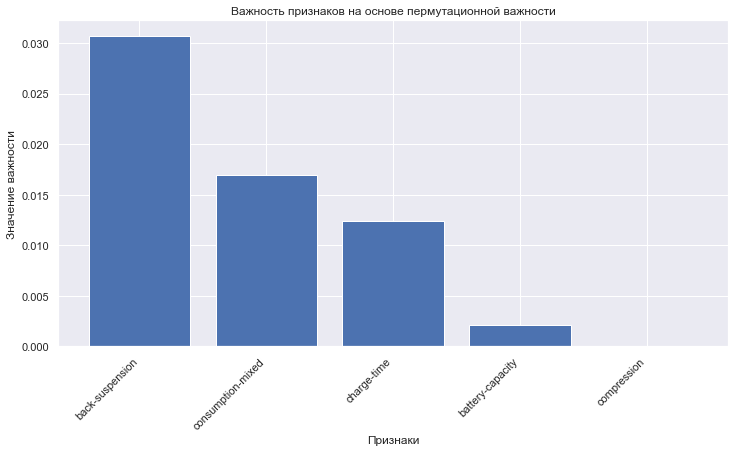

In [82]:
import matplotlib.pyplot as plt

# Создание графика гистограммы значений важности признаков
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), [importance for feature, importance in sorted_feature_importances], tick_label=[feature for feature, importance in sorted_feature_importances])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признаки')
plt.ylabel('Значение важности')
plt.title('Важность признаков на основе пермутационной важности')
plt.show()

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [83]:
from sklearn.preprocessing import PolynomialFeatures

# Создание объекта PolynomialFeatures степени 2 
pol = PolynomialFeatures(degree=2)

# Преобразование исходных признаков в полиномиальные
X_pol = pol.fit_transform(test_cut_X)

# Создание нового DataFrame с полиномиальными признаками
pol_1 = pd.DataFrame(X_pol, columns=pol.get_feature_names(test_cut_X.columns))

# Вывод первых строк нового DataFrame с полиномиальными признаками
print(pol_1.head())

     1  back-suspension  battery-capacity  charge-time  compression  \
0  1.0             10.0              -1.0       6384.0          8.2   
1  1.0             10.0              -1.0       5682.0         -1.0   
2  1.0              8.0              -1.0      15790.0          9.5   
3  1.0              3.0              -1.0      36828.0         -1.0   
4  1.0              3.0              -1.0      39082.0         10.5   

   consumption-mixed  back-suspension^2  back-suspension battery-capacity  \
0               -1.0              100.0                             -10.0   
1               -1.0              100.0                             -10.0   
2                5.5               64.0                              -8.0   
3               -1.0                9.0                              -3.0   
4               -1.0                9.0                              -3.0   

   back-suspension charge-time  back-suspension compression  ...  \
0                      63840.0            

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y['target'].ravel(), test_size=0.33, random_state=42)


# Инициализация модели случайного леса для отбора признаков
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели для отбора признаков
clf.fit(train_X, train_y)

# Отбор признаков на основе важности
sfm = SelectFromModel(clf, prefit=True)

# Применение отобранных признаков к обучающему и тестовому наборам данных
X_train_selected = sfm.transform(train_X)
X_test_selected = sfm.transform(test_X)

# Инициализация и обучение модели на отобранных признаках
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, train_y)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test_selected)

# Оценка качества модели на тестовом наборе
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy}')

C:\Users\София\AppData\Local\Temp\ipykernel_9920\95563774.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_X, train_y)


Вывод: Интерпретация оценки качества модели 0.9662252119683273 указывает на высокую точность модели в предсказании на тестовом наборе данных. Это свидетельствует о хорошем качестве обучения модели и ее способности делать точные прогнозы.